# The third example of a simple keras classifier. #
Here, we are going to make islands of categorized points in a sea of uncharacterized points.

In [1]:
import random
import math
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
from keras.layers import Dense, Activation

In [4]:
from keras.utils.vis_utils import plot_model

In this example, we'll make 3 circular regions centered around points in the x-y plane. Points within the circular regions are assigned to a class and everything not in is a different class.

In [5]:
num_points=5000
num_fit = 5000
point_data = []
group_data = []
grp_ctr = np.array([0,0,0,0])
for i in range(num_points):
  mag = math.sqrt(-2*math.log(random.random()))
  phase = 2*math.pi*random.random()
  xy = [mag*math.cos(phase),mag*math.sin(phase)]
  point_data.append(xy);
  if np.linalg.norm(np.array(xy)-np.array([0,0])) < .3:
    group_data.append([1,0,0,0])
    grp_ctr[0] = grp_ctr[0] + 1
  elif np.linalg.norm(np.array(xy)-np.array([1,-.5])) < .4:
    group_data.append([0,1,0,0])
    grp_ctr[1]= grp_ctr[1] + 1
  elif np.linalg.norm(np.array(xy)-np.array([-1,-1])) < 1:
    group_data.append([0,0,1,0])
    grp_ctr[2]= grp_ctr[2] + 1
  else:
    group_data.append([0,0,0,1])
    grp_ctr[3]= grp_ctr[3] + 1
groups = np.array(group_data)
points = np.array(point_data)

In [6]:
grp_ctr

array([ 219,  242,  876, 3663])

This is what the classes look like blue, red and green are assigned to 0, 1 and 2. Everything else is 3.

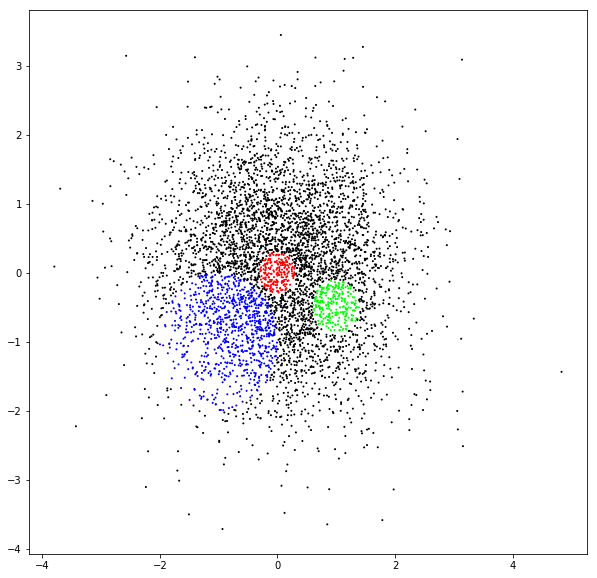

In [7]:
gp = np.array(group_data)
plt.rcParams['figure.figsize'] = [10,10]
plt.scatter(points[:,0],points[:,1],s=1,
            c=np.transpose(np.array([gp[:,0],gp[:,1],gp[:,2]])))

Make a 3 layer model with softmax activation

In [8]:
model = Sequential()
model.add(Dense(10,input_shape=(2,)))
model.add(Dense(10,activation='softmax'))
model.add(Dense(10,activation='softmax'))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='rmsprop',loss='mse')

history = model.fit(points[0:num_fit],groups[0:num_fit],epochs=50,validation_split=0.25, batch_size=100,verbose=False)

group_pred = model.predict(points)

num_right = 0
num_wrong = 0
for i in range(num_points):
    if np.argmax(group_pred[i])==np.argmax(groups[i]):
        num_right = num_right + 1
    else:
        num_wrong = num_wrong + 1
        
print ('There are '+str(num_right)+' correctly classifield points and '+
       str(num_wrong)+' wrong.')


There are 4313 correctly classifield points and 687 wrong.


And how they look

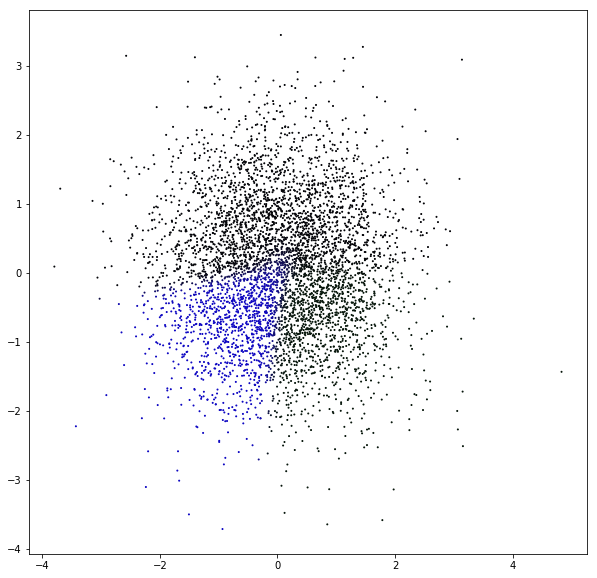

In [9]:
plt.scatter(points[:,0],points[:,1],s=1,
            c=np.transpose(np.array([group_pred[:,0],group_pred[:,1],group_pred[:,2]])))

Not very good.

Now do the same thing with x^2 activation layers

In [10]:
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
def sq_activation(x):
    return (K.square(x))

get_custom_objects().update({'sq_activation':Activation(sq_activation)})
model = Sequential()
model.add(Dense(10,input_shape=(2,)))
model.add(Dense(10,activation='sq_activation'))
model.add(Dense(10,activation='sq_activation'))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='rmsprop',loss='mse')

history = model.fit(points[0:num_fit],groups[0:num_fit],epochs=50,validation_split=0.25, batch_size=100,verbose=False)

group_pred = model.predict(points)

num_right = 0
num_wrong = 0
for i in range(num_points):
    if np.argmax(group_pred[i])==np.argmax(groups[i]):
        num_right = num_right + 1
    else:
        num_wrong = num_wrong + 1
        
print ('There are '+str(num_right)+' correctly classifield points and '+
       str(num_wrong)+' wrong.')


There are 4919 correctly classifield points and 81 wrong.


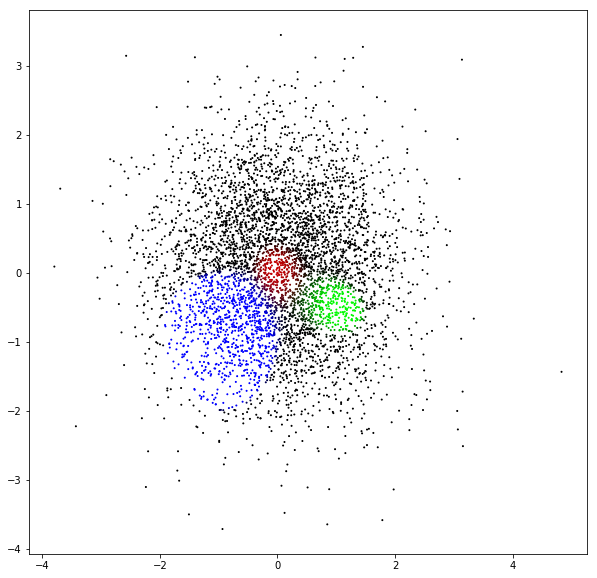

In [11]:
plt.scatter(points[:,0],points[:,1],s=1,
            c=np.transpose(np.array([group_pred[:,0],group_pred[:,1],group_pred[:,2]])))